This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, L \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
import os
from pyps import Basis, Hamiltonian
from pyps.constants import En_h, h, c, e, a0
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.formatter.useoffset"] = False

In [2]:
# construct matrix
H_rydberg = Hamiltonian(Basis(n_values=range(28, 34), S_values=[0], MJ_values=[2]))
print("Number of basis states:", "%d" % H_rydberg.basis.num_states)

H_circular = Hamiltonian(Basis(n_values=range(29, 33), S_values=[0], MJ_values=[29]))
print("Number of basis states:", "%d" % H_circular.basis.num_states)

Number of basis states: 171
Number of basis states: 6


In [3]:
# calculate Stark map using the numerov method
field = np.linspace(0, 50, 300)  # V/cm
rydberg = H_rydberg.stark_map(field * 100, units="/cm", numerov=True)
circular = H_circular.stark_map(field * 100, units="/cm", numerov=True)

diagonalise matrix: 100%|███████████████████| 300/300 [00:00<00:00, 2296.39it/s]


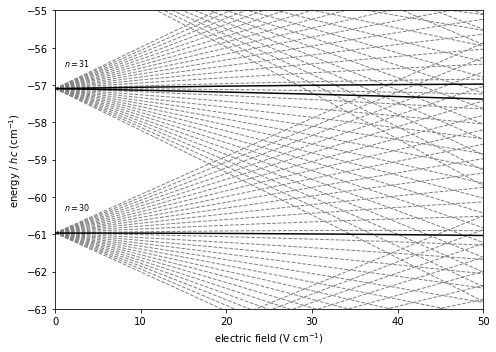

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))

# plot
# MJ = 2
for i in range(H_rydberg.basis.num_states):
    ax.plot(field, rydberg[:, i], ls="--", lw=1, alpha=1, c=(0.5, 0.5, 0.5))

# MJ = 30
for i in range(H_circular.basis.num_states):
    ax.plot(field, circular[:, i], ls="-", lw=1.5, alpha=1, c="k")

# labels
for n in [30, 31]:
    state = next(H_rydberg.basis.where(lambda x: x.n == n))
    en = state.energy(units="/cm")
    ax.annotate(r"$n=%d$" % n, [1, en + 0.6], size=8)

# format
ax.set_xlabel("electric field (V cm$^{-1}$)")
ax.set_ylabel("energy / $h c$ (cm$^{-1}$)")
ax.set_xlim(0, 50)
ax.set_ylim(-63, -55)

# output
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
plt.savefig(fileout, dpi=150)
plt.show()